In [1]:
%%capture
!pip install -r '../requirements.txt'

In [14]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('seaborn-darkgrid')

In [86]:
#Cargamos el dataset
df_raw = pd.read_csv("../data/raw/full_info.csv")

In [8]:
#Información básica sobre el dataset
df_raw.info()

#22 variables, 728793 observaciones, hay valores nulos.
#La columna tweet tiene 1297 valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728793 entries, 0 to 728792
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TweetID                     728793 non-null  float64
 1   User                        728793 non-null  object 
 2   Handle                      728793 non-null  object 
 3   PostDate                    728793 non-null  object 
 4   Tweet                       727496 non-null  object 
 5   Attachment                  195613 non-null  object 
 6   ReplyCount                  728793 non-null  float64
 7   RetweetCount                728793 non-null  float64
 8   LikeCount                   728793 non-null  float64
 9   TweetAndAttachment          727845 non-null  object 
 10  PreprocessedEmbeddings      727842 non-null  object 
 11  infered_label_cbow          728793 non-null  object 
 12  PreprocessedNERs            727560 non-null  object 
 13  TweetPreproces

In [7]:
df_raw.head()

,TweetID,User,Handle,PostDate,Tweet,Attachment,ReplyCount,RetweetCount,LikeCount,TweetAndAttachment,...,PreprocessedNERs,TweetPreprocessedNERs,AttachmentPreprocessedNERs,LocalidadesSpacy,PersonasSpacy,OrganizacionesSpacy,LocalidadesStanza,PersonasStanza,OrganizacionesStanza,cluster
0,5.498827e+17,Brecha,@SemanarioBrecha,2014-12-30T11:00:21.000Z,Brecha conversó sobre Aratirí con el subsecret...,NaN,0.0,1.0,0.0,Brecha conversó sobre Aratirí con el subsecret...,...,Brecha conversó sobre Aratirí con el subsecret...,Brecha conversó sobre Aratirí con el subsecret...,NaN,"['Aratirí', 'Brecha']","['Edgardo Ortuño', 'Industria']",[],[],"['Edgardo Ortuño', 'Brecha', 'Aratirí']",[],8
1,5.496712e+17,Brecha,@SemanarioBrecha,2014-12-29T21:00:09.000Z,El personaje del inspector Maigret vendió más ...,NaN,0.0,0.0,4.0,El personaje del inspector Maigret vendió más ...,...,El personaje del inspector Maigret vendió más ...,El personaje del inspector Maigret vendió más ...,NaN,[],['Maigret'],[],[],['Maigret'],[],17
2,5.496103e+17,Brecha,@SemanarioBrecha,2014-12-29T16:57:57.000Z,Víctor Hugo Abelando analiza en esta nota las ...,NaN,0.0,0.0,0.0,Víctor Hugo Abelando analiza en esta nota las ...,...,Víctor Hugo Abelando analiza en esta nota las ...,Víctor Hugo Abelando analiza en esta nota las ...,NaN,[],['Víctor Hugo Abelando'],['FA'],[],['Víctor Hugo Abelando'],['FA'],8
3,5.495958e+17,Brecha,@SemanarioBrecha,2014-12-29T16:00:19.000Z,En España 7 personas están presas acusadas de ...,NaN,0.0,0.0,1.0,En España 7 personas están presas acusadas de ...,...,En España 7 personas están presas acusadas de ...,En España 7 personas están presas acusadas de ...,NaN,[],[],[],['España'],[],[],11
4,5.495203e+17,Brecha,@SemanarioBrecha,2014-12-29T11:00:18.000Z,#Ajena en Mal Abrigo: una dimensión territoria...,NaN,0.0,0.0,1.0,#Ajena en Mal Abrigo: una dimensión territoria...,...,#Ajena en Mal Abrigo: una dimensión territoria...,#Ajena en Mal Abrigo: una dimensión territoria...,NaN,"['Estado', 'Mal Abrigo']",[],[],['Mal Abrigo'],[],['Estado'],14


In [87]:
#Copiamos el df para hacer transformaciones
df_interim = df_raw.copy()

In [88]:
#Pasamos postdate a tipo fecha
df_interim['PostDate'] = df_interim['PostDate'].astype('datetime64')
#Pasamos tweets a tipo string
df_interim['Tweet'] = df_interim['Tweet'].astype('string')

In [89]:
#Nos quedamos con las variables relevantes para nuestro análisis
df_interim = df_interim[['TweetID', 'User', 'Handle', 'PostDate', 'Tweet', 'ReplyCount', 'RetweetCount', 'LikeCount', 'PersonasSpacy']]

In [112]:
#Creamos columnas con las fechas por separado
df_interim['year'] = df_interim['PostDate'].dt.year
df_interim['month'] = df_interim['PostDate'].dt.month
df_interim['date'] = df_interim.apply(lambda x: x['PostDate'].strftime("%Y-%m-%d"), axis=1)

In [116]:
df_interim.head()

,TweetID,User,Handle,PostDate,Tweet,ReplyCount,RetweetCount,LikeCount,PersonasSpacy,year,month,day
0,5.498827e+17,Brecha,@SemanarioBrecha,2014-12-30 11:00:21,Brecha conversó sobre Aratirí con el subsecret...,0.0,1.0,0.0,"['Edgardo Ortuño', 'Industria']",2014,12,30
1,5.496712e+17,Brecha,@SemanarioBrecha,2014-12-29 21:00:09,El personaje del inspector Maigret vendió más ...,0.0,0.0,4.0,['Maigret'],2014,12,29
2,5.496103e+17,Brecha,@SemanarioBrecha,2014-12-29 16:57:57,Víctor Hugo Abelando analiza en esta nota las ...,0.0,0.0,0.0,['Víctor Hugo Abelando'],2014,12,29
3,5.495958e+17,Brecha,@SemanarioBrecha,2014-12-29 16:00:19,En España 7 personas están presas acusadas de ...,0.0,0.0,1.0,[],2014,12,29
4,5.495203e+17,Brecha,@SemanarioBrecha,2014-12-29 11:00:18,#Ajena en Mal Abrigo: una dimensión territoria...,0.0,0.0,1.0,[],2014,12,29


In [60]:
#Eliminamos los valores nulos de la columna tweets
df_interim = df_interim.dropna(axis=0)

In [113]:
#Copiamos el dataframe para hacer EDA
df = df_interim.copy()

## Exploratory Data Analysis


In [128]:
#Cantidad de medios distintos
df['User'].unique()

array(['Brecha', 'BÚSQUEDA', 'El Observador', 'EL PAÍS', 'la diaria',
       'La República'], dtype=object)

In [20]:
#Cantidad de tweets totales según medio de comunicación
df.groupby('User').size().reset_index(name='Count').sort_values(by='Count',ascending=False)

,User,Count
2,EL PAÍS,287310
3,El Observador,165246
4,La República,155983
5,la diaria,80520
1,BÚSQUEDA,27301
0,Brecha,12433


In [11]:
#Estadísticas descriptivas de las variables numéricas
df[['ReplyCount', 'RetweetCount', 'LikeCount']].describe()

,ReplyCount,RetweetCount,LikeCount
count,728793.000000,728793.000000,728793.000000
mean,1.575720,4.318377,8.037504
std,7.752874,16.592098,41.372540
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,2.000000,2.000000
75%,1.000000,4.000000,6.000000
max,952.000000,4000.000000,13700.000000


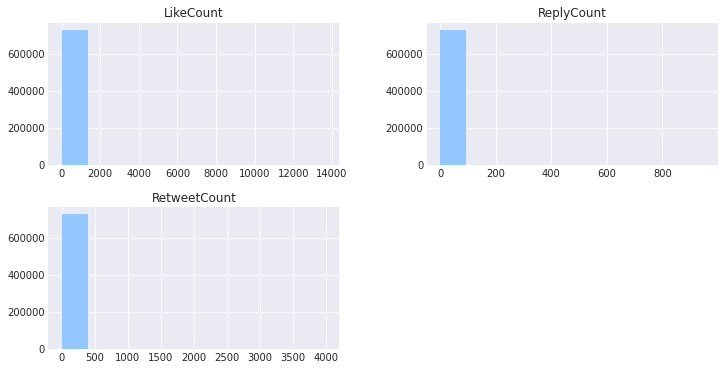

In [15]:
#Histograma de las variables numéricas
df[['LikeCount', 'ReplyCount', 'RetweetCount']].hist(figsize= (12, 6))
plt.show()

In [14]:
#Cantidad de tweets correspondientes a los años 2020 y 2021 según medio de comunicación
df.groupby(['year','User']).size().reset_index(name='Count').sort_values(by=(['year', 'User']),ascending=False)[:12]

,year,User,Count
64,2021,la diaria,10084
63,2021,La República,8857
62,2021,El Observador,11129
61,2021,EL PAÍS,22552
60,2021,BÚSQUEDA,1145
59,2021,Brecha,533
58,2020,la diaria,20495
57,2020,La República,19493
56,2020,El Observador,31426
55,2020,EL PAÍS,53294


In [60]:
#Los 10 tweets más retweeteados con fecha y autor
df.sort_values(by='RetweetCount', ascending = False)[['Tweet', 'RetweetCount', 'PostDate', 'User']][:10]

,Tweet,RetweetCount,PostDate,User
263191,Tiene 12 años y fue becada para viajar a la NA...,4000.0,2018-05-13 10:07:06,EL PAÍS
345166,Bolsonaro cruzó la avenida de las leyes para s...,2600.0,2020-03-01 16:40:18,EL PAÍS
259344,Hinchas uruguayos se inspiraron en los japones...,2300.0,2018-06-20 17:44:55,EL PAÍS
240965,AHORA | El gobierno uruguayo no concederá asil...,2200.0,2018-12-03 13:16:37,EL PAÍS
556052,"“El baile de los que sobran”, la canción de Lo...",1900.0,2019-10-22 22:30:48,la diaria
249381,Revolucionó la educación de Perú y ahora llega...,1700.0,2018-09-04 18:43:35,EL PAÍS
522490,Nuestra portada de hoy,1600.0,2021-04-30 10:30:34,la diaria
207408,La reacción del presidente electo @LuisLacall...,1400.0,2019-12-02 16:25:46,EL PAÍS
327271,"Lacalle, en entrevista con @todonoticias : ""L...",1100.0,2020-07-15 01:53:51,EL PAÍS
62699,El tricolor es el club que ganó más torneos of...,1100.0,2017-04-01 12:45:00,El Observador


In [61]:
#Los 10 tweets más likeados con fecha y autor
df.sort_values(by='RetweetCount', ascending = False)[['Tweet', 'LikeCount', 'PostDate', 'User']][:10]

,Tweet,LikeCount,PostDate,User
263191,Tiene 12 años y fue becada para viajar a la NA...,13700.0,2018-05-13 10:07:06,EL PAÍS
345166,Bolsonaro cruzó la avenida de las leyes para s...,7200.0,2020-03-01 16:40:18,EL PAÍS
259344,Hinchas uruguayos se inspiraron en los japones...,5800.0,2018-06-20 17:44:55,EL PAÍS
240965,AHORA | El gobierno uruguayo no concederá asil...,3600.0,2018-12-03 13:16:37,EL PAÍS
556052,"“El baile de los que sobran”, la canción de Lo...",3600.0,2019-10-22 22:30:48,la diaria
249381,Revolucionó la educación de Perú y ahora llega...,2700.0,2018-09-04 18:43:35,EL PAÍS
522490,Nuestra portada de hoy,3400.0,2021-04-30 10:30:34,la diaria
207408,La reacción del presidente electo @LuisLacall...,1400.0,2019-12-02 16:25:46,EL PAÍS
327271,"Lacalle, en entrevista con @todonoticias : ""L...",4800.0,2020-07-15 01:53:51,EL PAÍS
62699,El tricolor es el club que ganó más torneos of...,947.0,2017-04-01 12:45:00,El Observador


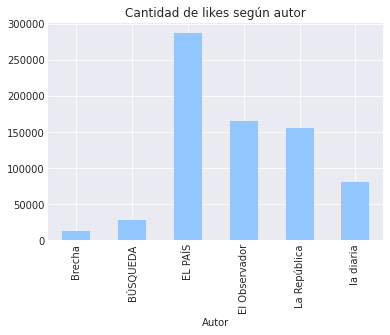

In [16]:
#Plot de la cantidad de likes según autor
df.groupby('User').size().plot.bar(x='year',y='LikeCount',title='Cantidad de likes según autor', xlabel='Autor')
plt.show()

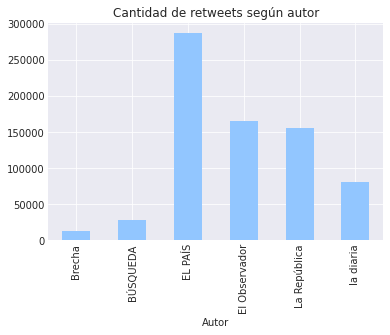

In [17]:
#Plot de los retweets según autor
df.groupby('User').size().plot.bar(x='year',y='RetweetCount',title='Cantidad de retweets según autor', xlabel='Autor')
plt.show()

In [11]:
#Cantidad de tweets del diario El País (el diario más activo en twitter) agrupados por año
df[df['User']=='EL PAÍS'].groupby('year').agg({'Tweet':'size'})

,Tweet
year,
2009,3330
2010,9437
2011,6155
2012,14291
2013,12327
2014,15358
2015,17608
2016,29481
2017,32559


In [81]:
#Cantidad de retweets del diario El País (el diario más activo en twitter) agrupados por año
df[df['User']=='EL PAÍS'].groupby('year').agg({'RetweetCount':'sum'})

,RetweetCount
year,
2009,18.0
2010,1773.0
2011,5566.0
2012,29070.0
2013,30051.0
2014,92591.0
2015,112897.0
2016,182310.0
2017,169511.0


In [102]:
df.head()

,TweetID,User,Handle,PostDate,Tweet,ReplyCount,RetweetCount,LikeCount,PersonasSpacy,year,month
0,5.498827e+17,Brecha,@SemanarioBrecha,2014-12-30 11:00:21,Brecha conversó sobre Aratirí con el subsecret...,0.0,1.0,0.0,"['Edgardo Ortuño', 'Industria']",2014,12
1,5.496712e+17,Brecha,@SemanarioBrecha,2014-12-29 21:00:09,El personaje del inspector Maigret vendió más ...,0.0,0.0,4.0,['Maigret'],2014,12
2,5.496103e+17,Brecha,@SemanarioBrecha,2014-12-29 16:57:57,Víctor Hugo Abelando analiza en esta nota las ...,0.0,0.0,0.0,['Víctor Hugo Abelando'],2014,12
3,5.495958e+17,Brecha,@SemanarioBrecha,2014-12-29 16:00:19,En España 7 personas están presas acusadas de ...,0.0,0.0,1.0,[],2014,12
4,5.495203e+17,Brecha,@SemanarioBrecha,2014-12-29 11:00:18,#Ajena en Mal Abrigo: una dimensión territoria...,0.0,0.0,1.0,[],2014,12


In [141]:
#Primer tweet de cada diario
gb = df.groupby(['User'])
gb.agg(first_date=('date', np.min)).reset_index().sort_values(by='first_date')

,User,first_date
2,EL PAÍS,2009-04-15
5,la diaria,2010-01-09
1,BÚSQUEDA,2010-09-02
4,La República,2011-03-17
0,Brecha,2011-04-01
3,El Observador,2016-04-10


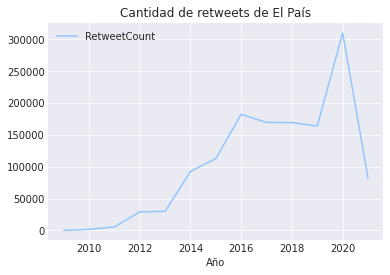

In [22]:
#Plot de la cantidad de retweets del diario El País por año
df[df['User']=='EL PAÍS'].groupby('year').agg({'RetweetCount':'sum'}).plot()
plt.xlabel('Año')
plt.title('Cantidad de retweets de El País')
plt.show()

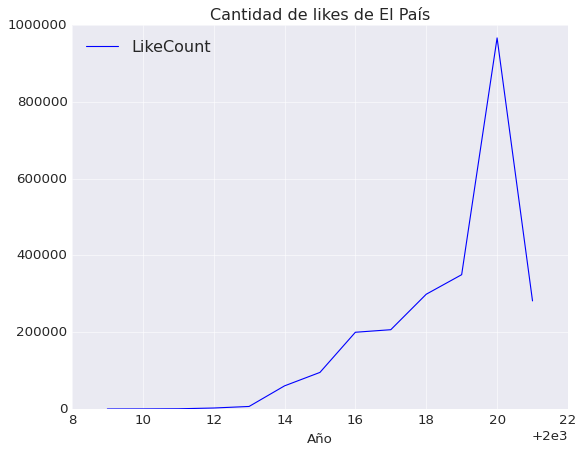

In [148]:
#Plot de la cantidad de likes del diario El País por año
df[df['User']=='EL PAÍS'].groupby('year').agg({'LikeCount':'sum'}).plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Año')
plt.title('Cantidad de likes de El País')
plt.show()

In [160]:
df.head()

,TweetID,User,Handle,PostDate,Tweet,ReplyCount,RetweetCount,LikeCount,PersonasSpacy,year,month,day,date
0,5.498827e+17,Brecha,@SemanarioBrecha,2014-12-30 11:00:21,Brecha conversó sobre Aratirí con el subsecret...,0.0,1.0,0.0,"['Edgardo Ortuño', 'Industria']",2014,12,30,2014-12-30
1,5.496712e+17,Brecha,@SemanarioBrecha,2014-12-29 21:00:09,El personaje del inspector Maigret vendió más ...,0.0,0.0,4.0,['Maigret'],2014,12,29,2014-12-29
2,5.496103e+17,Brecha,@SemanarioBrecha,2014-12-29 16:57:57,Víctor Hugo Abelando analiza en esta nota las ...,0.0,0.0,0.0,['Víctor Hugo Abelando'],2014,12,29,2014-12-29
3,5.495958e+17,Brecha,@SemanarioBrecha,2014-12-29 16:00:19,En España 7 personas están presas acusadas de ...,0.0,0.0,1.0,[],2014,12,29,2014-12-29
4,5.495203e+17,Brecha,@SemanarioBrecha,2014-12-29 11:00:18,#Ajena en Mal Abrigo: una dimensión territoria...,0.0,0.0,1.0,[],2014,12,29,2014-12-29


In [ ]:
#Agrupamos para graficar
dfg = df.groupby(['year', 'User']).agg({'LikeCount':'sum'}).reset_index()

In [167]:
#Serie de la cantidad de likes por usuario
fig = px.line(dfg, x="year", y="LikeCount", color='User')
fig.show()

In [37]:
#Las 10 palabras que más se repiten (todas son stopwords, como era esperable)
df['Tweet'].str.split(expand = True).stack().value_counts()[:10]

de      714117
la      348808
en      335181
el      271087
y       246435
a       236333
que     200250
del     154718
los     123348
para    112114
dtype: Int64

## Data pre-processing

In [77]:
#Limpiamos el texto para poder hacer NLP
#Pasamos a minúsculas
df['tweets_clean'] = df['Tweet'].str.lower()

#Eliminamos URLs de fotos de tweets:
url_pat = 'https://t.co/[A-Za-z\d]+|&amp;'
df['tweets_clean'] = df['tweets_clean'].str.replace(url_pat, '', regex = True)

#Eliminamos https
df['tweets_clean'] = df['tweets_clean'].str.replace('https', '', regex = True)
df['tweets_clean'] = df['tweets_clean'].str.replace('http', '', regex = True)
df['tweets_clean'] = df['tweets_clean'].str.replace('.com.uy', '', regex = True)
df['tweets_clean'] = df['tweets_clean'].str.replace('http://larepublica.com.uy', '', regex = True)
df['tweets_clean'] = df['tweets_clean'].str.replace('https://larepublica.com.uy', '', regex = True)


#Eliminamos caracteres especiales:
df['tweets_clean'] = df['tweets_clean'].str.replace(r'''[!.,():\-%$/'"''&;'\n\n'#|']''', '', regex = True)

In [78]:
#Definimos función para eliminar stopwords
def clean_stopwords(text: str,stop_dict: dict)->str:
    if text is not None:
        words = text.split()
        words_clean = []
        for word in words:
            if word not in stop_dict:
                words_clean.append(word)
        result = ' '.join(words_clean)
    else:
        result = None
    return result

In [79]:
#Eliminamos los stopwords de la columna tweets_clean
stop_dict = stopwords.words('spanish')
df['tweets_clean'] = df['tweets_clean'].apply(lambda x: clean_stopwords(x, stop_dict = stop_dict)) 

In [80]:
#Las 10 palabras más mencionadas
df['tweets_clean'].str.split(expand = True).stack().value_counts()[:10]

uruguay       33715
años          21846
gobierno      21763
hoy           21314
montevideo    18311
dos           15794
nacional      15249
dijo          15114
tras          14717
nuevo         14617
dtype: int64

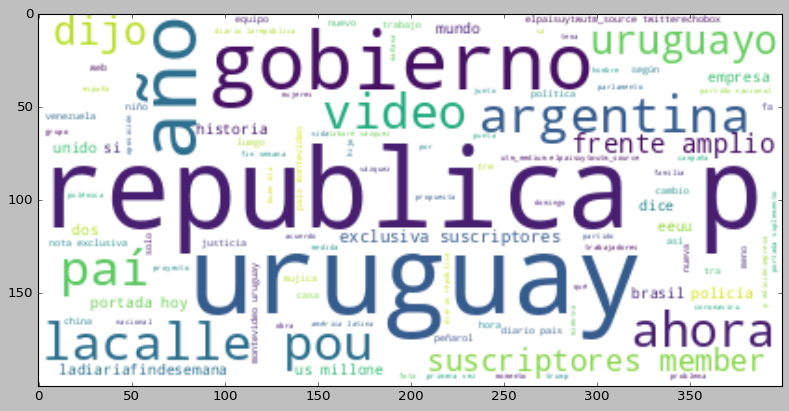

In [81]:
#Generamos nube de palabras
from wordcloud import WordCloud
text = ' '.join(i for i in df.tweets_clean)
wordcloud = WordCloud(max_words=100, background_color='White').generate(text)
plt.style.use('classic')
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##Ver qué onda por qué no se borra ese república

# PRUEBAS NLP:

In [17]:
#PRUEBA NLP CINDY
from textblob import TextBlob
 
TextBlob('La camiseta es bonita.').sentiment
analysis1 = TextBlob("This table is black")
analysis2 = TextBlob("La camiseta es fea.")
analysis1.sentiment
analysis2.sentiment


Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
#PRUEBA NLP BELU:

In [28]:
%%capture
!pip install sentiment-analysis-spanish
!pip install keras tensorflow

In [29]:
from sentiment_analysis_spanish import sentiment_analysis

In [30]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("me gusta el café es genial"))

#The function sentiment(text) returns a number between 0 and 1. This is the probability of string variable text of being "positive". 
#Low probabilities mean that the text is negative (numbers close to 0)
#High probabilities (numbers close to 1) mean that the text is positive. The space in between corespond to neutral texts.

0.950769940243863


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


https://colab.research.google.com/github/pysentimiento/pysentimiento/blob/master/notebooks/PySentimiento_Sentiment_Analysis_in_Spanish.ipynb

In [ ]:
#PROBAR FASTTEXT